In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d



plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from scipy.integrate import quad,dblquad

from matplotlib import cm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

## Review Example

A spherical shell 2 cm in radius has density the square of the distance to the top pole (in g/cm$^2$). Write down an integral to compute its total mass. 

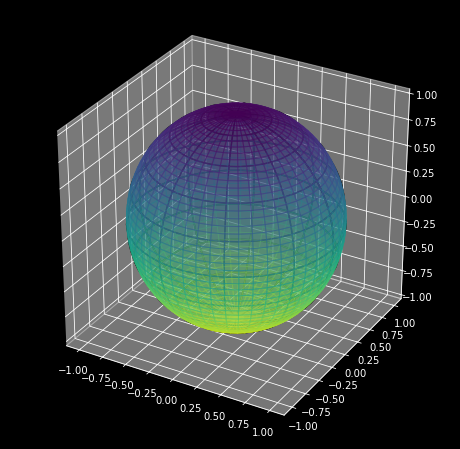

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,pi,50)
v = np.linspace(0,2*pi,50)
U,V = np.meshgrid(u,v)
mc = cm.viridis((2-2*cos(U))/4)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,cmap='viridis',facecolors=mc)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10);


<p style="padding-bottom:40%;"> </p>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Lecture 22

## Flux Integrals and the Divergence Theorem

  - Objectives
    - Compute surface integrals
      - of a scalar field w/r/t surface area
      - of a vector field (flux integrals)
    - Curl and Divergence
      - in the plane, via Green's
      - formulas in $\RR^3$
      - $\nabla$ notation
      

  - Resources
    - Content
      - Stewart: §16.5–6
      - New Strang:  
        - [§6.5](https://openstax.org/books/calculus-volume-3/pages/6-5-divergence-and-curl) [§6.6](https://openstax.org/books/calculus-volume-3/pages/6-6-surface-integrals) 
      - [3Demos](https://drew.youngren.nyc/3Demos/surfint/index.html)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Divergence Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInDivergenceTheorem)
    - Extras 
      - CalcBLUE: [2-Form Fields](https://www.youtube.com/watch?v=LNaAEy_K-Cg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=64) *Use with caution. This is a different and more general formulation of surface integrals. 

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

#### Answer

We put the coordinate axes at the center. The density is thus $\rho(x,y,z) = x^2 + y^2 +(2-z)^2$. 

Parametrize the sphere as $$\vec r(u,v) = \begin{bmatrix} 2\sin u \cos v \\ 2 \sin u \sin v \\ 2 \cos u \\ \end{bmatrix}$$ for $0 \leq u \leq \pi, 0 \leq v \leq 2\pi$, which gives the familiar

$$|\vec r_u\times \vec r_v| = 4\sin u.$$

We compute

$$\text{mass} = \iint_\Omega \rho\, dS = \int_0^\pi \int_0^{2\pi} (5-4\cos u)4\sin u \,dv\,du = 80\pi$$ 


<p style="padding-bottom:40%;"> </p>

# Orientation

A surface $\Omega$ is **oriented** if there is a continuous choice of unit normal vector $\vec N$ at each point of the surface.

That is, there is a chosen "direction" through the surface. 

Practically speaking, we arrange the parametrization $\vec r(u,v)$ such that $\vec r_u\times \vec r_v$ points in the direction of $\vec N$. 

### Common examples

  - Orient the graph of a function "upward".
   
$$\vec r(u,v) = u \,\vec i + v \,\vec j + (1-u^2) \,\vec k $$ 

for $-1\leq u,v \leq 1$.
  

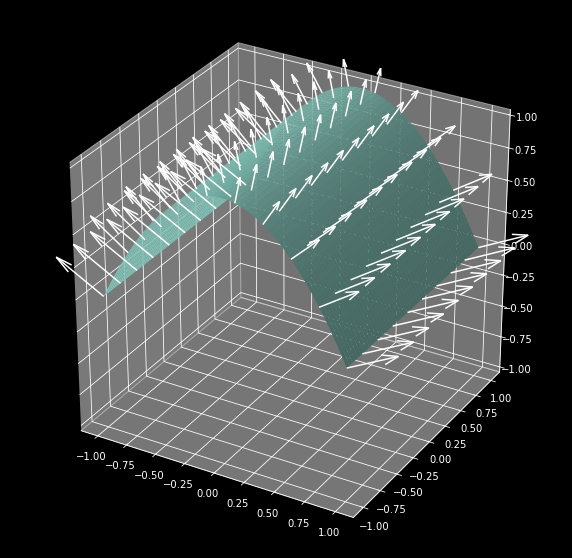

In [3]:
u = v = np.linspace(-1,1,100)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
U,V = np.meshgrid(u,v)
ax.plot_surface(U,V,1-U**2)
u = v = np.linspace(-1,1,10)
U,V = np.meshgrid(u,v)
ax.set_zlim((-1,1))
ax.quiver(U,V,1-U**2,2*U,0,1,length=.2);

<p style="padding-bottom:40%;"> </p>

### Common examples

  - Orient a surface of revolution "outward".
   
$$\vec r(u,v) = (1+u)\cos v \,\vec i + u \,\vec j + (1+u)\sin v \,\vec k $$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

In [4]:
@interact
def _(angle=(-96,96,6)):
    u = np.linspace(-1,1,100)
    v = np.linspace(0,2*pi,100) 
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.view_init(30,angle)
    U,V = np.meshgrid(u,v)
    ax.plot_surface((1+U)/2*cos(V),U,(1+U)/2*sin(V),alpha=.6)
    u = np.linspace(-1,1,10)
    v = np.linspace(0,2*pi,10) 
    U,V = np.meshgrid(u,v)
    ax.set_zlim((-1,1))
    ax.quiver((1+U)/2*cos(V),U,(1+U)*sin(V)/2,(1+U)/2*cos(V),-1/2-U/2,(1+U)/2*sin(V),length=.2,color='k');

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), Output()), _dom_classe…

<p style="padding-bottom:40%;"> </p>

### Nonorientable

  - Some strange surfaces, like the _Möbius strip_, cannot be oriented
   
$$\vec r(u,v) = (\cos v + u/3 \cos(v/2)\cos(v)) \,\vec i + (\sin v + u/3\cos(v/2)\sin(v) \,\vec j + u/3\sin(v/2) \,\vec k $$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

In [5]:
@interact
def _(angle=(-96,96,6),t=(0,2*pi)):
    u = np.linspace(-1,1,5)
    v = np.linspace(0,2*pi,50) 
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.view_init(30,angle)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(1*cos(V)+U/3*cos(V/2)*cos(V),1*sin(V) + U/3*cos(V/2)*sin(V), U/3*sin(V/2),alpha=.6)
    u = np.linspace(-1,1,10)
#     v = np.linspace(0,2*pi,10) 
#     U,V = np.meshgrid(u,v)
    ax.set_zlim((-4/3,4/3))
    ax.quiver(1*cos(t)+U/3*cos(t/2)*cos(t),1*sin(t) + U/3*cos(t/2)*sin(t), U/3*sin(t/2), 
              U*sin(t)/18 - U*sin(2*t)/36 + sin(t/2)/6 - sin(3*t/2)/6,
              U*sin(t/2)**2*cos(t)/18 - U*sin(t)**2/12 - U*cos(t)/12 + U/36 - cos(t/2)/6 + cos(3*t/2)/6,
              (U*cos(t/2) + 3)*cos(t/2)/9,length=.5,color='k');

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), FloatSlider(value=3.14…

<p style="padding-bottom:40%;"> </p>

# Flux Integrals

A **flux integral** of a vector field $\vec F$ through a surface $\Omega$ (somethimes just the "surface integral of a vector field") with orientation $\vec N$ corresponding to parametrization $\vec r:\mathcal D \to \RR^3$ is 

$$\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F \cdot \vec N\,dS$$

  - Where? on a 2D surface $\Omega$ in $\RR^3$.

  - What? a vector field $\vec F$.

  - How? In the (positive) direction perpendicular to the surface.

$$= \iint_D \vec F(\vec r(u,v))\cdot \frac{r_u\times \vec r_v}{|\vec r_u \times \vec r_v|} |\vec r_u \times \vec r_v|\,dA $$

$$= \iint_D \vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v\,dA $$

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [6]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])

interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), IntSlider(value=42, d…

<p style="padding-bottom:40%;"> </p>

### Example

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $y=0$ for $0 \leq x,z \leq 1$
  - $\Omega_2$: piece of the plane $x= 0$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [7]:
@interact
def _(angle = (-96,6,6),p=(0,1,.05)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=.5)
    ax.plot_wireframe(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=0.0…

<p style="padding-bottom:40%;"> </p>

# Curl and Divergence

**Curl** and **divergence** are two measurements of change in a vector field. 

## Differential calculus in 30 seconds

  - One-variable calculus: $\displaystyle \frac{dy}{dx}$
  

  - curves: $\displaystyle \vec r'(t)$
  

  - scalar fields: $\displaystyle \nabla f(x,y)$

  - vector fields: $\displaystyle D \vec F?$

<p style="padding-bottom:40%;"> </p>



In $\RR^2$, Green's theorem offers us some answers. 

### Circulation and flux


$\displaystyle \oint_C \vec F\cdot d\vec r = \oint_C \vec F\cdot\vec T\, ds$ measures circulation of $\vec F$ around the closed curve $C$. So we can make sense of the (scalar) **curl** as the "circulation density"

$$ \operatorname{curl} \vec F = \lim_{r\to 0^+}\frac{\oint_{\partial\mathcal{D}_r} \vec F\cdot d\vec r}{\text{Area}(\mathcal D_r)} .$$

In [11]:
@interact(zoom=(.2,1,.1),th=(0,pi/2,pi/10))
def _(zoom=1,th=pi/2,P=fixed(lambda x,y: -y - x),Q=fixed(lambda x,y: x - y)):
    plt.figure(figsize=(7,7))
    x = y = np.concatenate([arange(.2,.2+1.2*zoom,.05),arange(.2,.2-1.2*zoom,-.05)])
    x,y = meshgrid(x,y)
    plt.quiver(x,y,P(x,y),Q(x,y),color='g')
    plt.plot([0,0],[-2,2],'k')
    plt.plot([-2,2],[0,0],'k')
    t = linspace(0,2*pi,57)
    plt.plot(.1*cos(t)+.2,.1*sin(t)+.2,'r',lw=2)
    plt.quiver(.1*cos(t)+.2,.1*sin(t)+.2,.1*cos(t)*cos(th)-.1*sin(t)*sin(th),.1*sin(t)*cos(th)+.1*cos(t)*sin(th),color='r',alpha=(zoom < .4) and 1 or 0)
    for c in 'xy':
        getattr(plt,f"{c}lim")(.2-zoom,.2+zoom)
    

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.2), FloatSlider(value=1.570796…

$$\operatorname{curl} \vec F = \lim_{r\to 0^+}\frac{\oint_{\partial\mathcal{D}_r} \vec F\cdot d\vec r}{\text{Area}(\mathcal D_r)} = \lim_{r\to 0^+}\frac{1}{\text{Area}(\mathcal D)_r} \iint_{\mathcal{D}_r} \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \, dA.$$

$$ = 
\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} $$

$\displaystyle \oint_C \vec F\cdot d\vec n = \oint_C \vec F\cdot\vec N\, ds $ measures flux (flow) of $\vec F$ out of the closed curve $C$. So we can make sense of the **divergence** as the "flux density"

$$ \operatorname{div} \vec F = \lim_{r\to 0^+}\frac{\oint_{\partial\mathcal{D}_r} \vec F\cdot d\vec n}{\text{Area}(\mathcal D_r)} .$$

In [12]:
@interact(zoom=(.2,1,.1),th=(0,pi/2,pi/10))
def _(zoom=1,th=pi/2,P=fixed(lambda x,y: -y - x),Q=fixed(lambda x,y: x - y)):
    plt.figure(figsize=(7,7))
    x = y = np.concatenate([arange(.2,.2+1.2*zoom,.05),arange(.2,.2-1.2*zoom,-.05)])
    x,y = meshgrid(x,y)
    plt.quiver(x,y,P(x,y),Q(x,y),color='g')
    plt.plot([0,0],[-2,2],'k')
    plt.plot([-2,2],[0,0],'k')
    t = linspace(0,2*pi,57)
    plt.plot(.1*cos(t)+.2,.1*sin(t)+.2,'r',lw=2)
    plt.quiver(.1*cos(t)+.2,.1*sin(t)+.2,.1*cos(t)*cos(th)-.1*sin(t)*sin(th),.1*sin(t)*cos(th)+.1*cos(t)*sin(th),color='r',alpha=(zoom < .4) and 1 or 0)
    for c in 'xy':
        getattr(plt,f"{c}lim")(.2-zoom,.2+zoom)
    

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.2), FloatSlider(value=1.570796…

$$ = \lim_{r\to 0^+}\frac{1}{\text{Area}(\mathcal D)_r} \iint_{\mathcal{D}_r} \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} \, dA.$$

$$ = 
\frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} $$

<p style="padding-bottom:40%;"> </p>

## Curl and Div in 2D

If $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle $, then 

$$\operatorname{curl} \vec F (x,y) = Q_x - P_y = \text{ "circulation density"}$$

  - positive $\leftrightarrow$ counterclockwise spin
  - negative $\leftrightarrow$ clockwise spin
  - zero $\leftrightarrow$ irrotational

$$\operatorname{div} \vec F (x,y) = P_x + Q_y = \text{ "flux density"}$$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

<p style="padding-bottom:40%;"> </p>

# What about 3D?

$$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$

Divergence is the same.

$$\operatorname{div} \vec F (x,y,z) = P_x + Q_y + R_z $$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

<p style="padding-bottom:40%;"> </p>

Curl not so much.

$$\operatorname{curl} \vec F (x,y,z) = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k $$


<p style="padding-bottom:40%;"> </p>

## Div, grad, curl
We introduce the "del" operator $\nabla$.

$$\nabla = \frac{\partial}{\partial x} \,\vec i + \frac{\partial}{\partial y} \,\vec j + \frac{\partial}{\partial z} \,\vec k $$

Applying vector operations to this "vector" yields different kinds of derivatives:

<p style="padding-bottom:40%;"> </p>

##  Scalar multiplication

The gradient of a scalar field $f(x,y,z)$ is a vector field given by 

$$\operatorname{grad}f = \nabla f = f_x \,\vec i + f_y \,\vec j + f_z \,\vec k$$

<p style="padding-bottom:40%;"> </p>

##  Dot product

The divergence of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is a scalar field given by 

$$\operatorname{div}\vec F = \nabla \cdot \vec F = P_x  + Q_y  + R_z $$

<p style="padding-bottom:40%;"> </p>

##  Cross product

The curl of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is another vector field given by 

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} $$ 

$$ = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$

<p style="padding-bottom:40%;"> </p>

In [10]:
%%html
<style>
th, td {
    font-size: large;
}
</style>

| name |&nbsp; form| in | out |
|---|---|---|---|
|derivative | &nbsp; $$\frac{d}{dx} f(x)$$ | scalar | scalar | 
|partial | $\frac{\partial}{\partial x}f(x,y)$ | scalar | scalar | 
| grad | $\nabla f(x,y)$ | scalar | vector |
| div | $\nabla \cdot \vec F(x,y,z)$ | vector | scalar |
| curl | $\nabla \times \vec F(x,y,z)$ | vector | vector |